In [2]:
DATA_PATH = "data/"

네이버 뉴스 IT/과학 탭의 기사 제목과 링크 가져오기(requests 사용)

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 네이버 뉴스 URL 설정 (예: IT/과학 뉴스 카테고리)
url = "https://news.naver.com/main/list.naver?mode=LSD&mid=shm&sid1=105"

# HTTP 요청을 통해 페이지 HTML 가져오기
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 기사 제목과 링크 추출
articles = soup.select("ul.type06_headline li dl dt a")

news_data = []
idx = 0
for article in articles:
    if idx % 2 != 0:
        title = article.get_text().strip()  # 기사 제목
        link = article['href']  # 기사 링크
        news_data.append({'title': title, 'link': link})
    idx += 1

# 데이터프레임으로 저장
df = pd.DataFrame(news_data)

# CSV 파일로 저장
df.to_csv(f"{DATA_PATH}naver_news.csv", index=False)

네이버 뉴스 IT/과학 탭의 기사 제목과 링크 가져오기(selenium 사용)

In [8]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# Selenium을 사용한 동적 페이지 로딩
driver = webdriver.Chrome()
driver.get("https://news.naver.com/main/list.naver?mode=LSD&mid=shm&sid1=105")

# 페이지 로딩 대기
time.sleep(3)

# 페이지 소스 가져오기
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

# 기사 정보 추출
articles = soup.select("ul.type06_headline li dl dt a")
news_data = []
idx = 0
for article in articles:
    if idx % 2 != 0:
        title = article.get_text().strip()
        link = article['href']
        news_data.append({'title': title, 'link': link})
    idx += 1
    
driver.quit()

# 데이터 저장
df = pd.DataFrame(news_data)
df.to_csv(f"{DATA_PATH}naver_news_dynamic.csv", index=False)

수집한 데이터를 wordcloud 로 표현

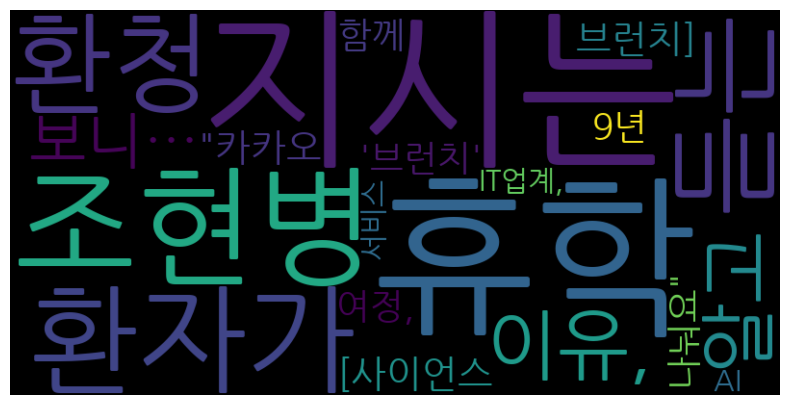

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = "C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf"

# 기사 제목에서 키워드 추출
titles = df['title'].tolist()
word_list = " ".join(titles).split()

# 빈도수 계산
word_counts = Counter(word_list)

# 상위 20개 키워드 추출
common_words = word_counts.most_common(20)

# 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400).generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()